In [114]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import scipy as super
from scipy.integrate import quad
import pandas as pd
from scipy.optimize import minimize
import numpy as np
from scipy.special import erf

import minuit as minuit

ModuleNotFoundError: No module named 'minuit'

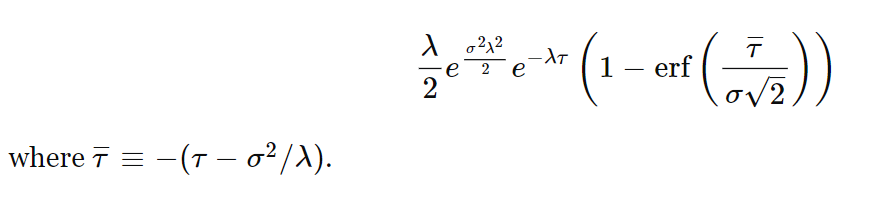

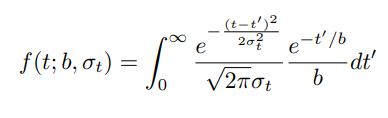

In [97]:
df = pd.read_csv('data3.txt', sep=' ', header=None)
times = np.array(df[0].values)

Using an interesting conversation on stack exchange we find the normalized integral is  

In [103]:
df = pd.read_csv('data3.txt', sep=' ', header=None)
times = np.array(df[0].values)
def pdf_conv(t, sigma, b):
    def new_pdf(sigma, b):
        s = np.linspace(0, 1000, 10000)
        
        y = (b/2)*np.exp(sigma**2*b**2/2)*np.exp(-s*b)*(1-erf((-(s-sigma**2/b)/(sigma*np.sqrt(2)))))


        c = np.trapz(y, s)
        return c
    y = (b/2)*np.exp(sigma**2*b**2/2)*np.exp(-t*b)*(1-erf((-(t-sigma**2/b)/(sigma*np.sqrt(2)))))/new_pdf(sigma,b)

    return y
def pdf_convulution_exponential_gauss_2d(t_array,b,sigma):
    t_array = np.sort(t_array.ravel())
    t_array = np.sort(t_array)
    pdf = np.zeros(len(t_array))
    i = int(0)
    for t in t_array:
        x = np.linspace(0, 200, 600)
        integrant = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(t-x)**2/(2*sigma**2))*(np.exp(-x/b)/b)
        pdf[i] = np.trapz(integrant, x)
        i += 1
    norm = np.trapz(pdf, t_array)
    return pdf/norm

def LLH(params, t):
    t = np.sort(t)
    sigma, b = params
    mask = t > 0
    t = t[mask]
    y = pdf_conv(t, sigma, b)
    return -np.sum(np.log(y))

def LLH1(sigma,t):
    t= np.sort(t)
    print(t)
    b =1 
    y = pdf_conv(t, sigma, b)
    mask = y > 0
    y = y[mask]
    return -np.sum(np.log(y))

# 0.1 is the initial guess for the parameter sigma
#making array of times

Like1 = np.zeros(100)
Like2 = np.zeros(100)

for i in range(100):
    t = times[200*i:200*(i+1)]
    a  = minimize(LLH1, 0.5, args=(t))
    b = minimize(LLH, [0.5, 1], args=(t))

    Like1[i] = LLH1(a.x, t)
    Like2[i] = LLH(b.x, t)










[-1.140708e+00 -9.843720e-01 -8.915470e-01 -8.095610e-01 -5.674580e-01
 -5.301040e-01 -5.188660e-01 -4.871710e-01 -4.853340e-01 -4.226990e-01
 -4.176280e-01 -4.116130e-01 -4.108460e-01 -4.044050e-01 -3.230090e-01
 -2.810440e-01 -2.563960e-01 -2.407670e-01 -2.085970e-01 -2.053580e-01
 -1.939460e-01 -1.882420e-01 -1.716420e-01 -1.407750e-01 -1.339460e-01
 -1.188350e-01 -1.165430e-01 -1.158980e-01 -1.150450e-01 -1.130280e-01
 -1.053840e-01 -9.319200e-02 -7.963700e-02 -6.593500e-02 -4.950400e-02
 -2.488000e-03  3.986600e-02  6.362000e-02  8.542200e-02  8.913600e-02
  9.007200e-02  1.184510e-01  1.322130e-01  1.431710e-01  1.441740e-01
  1.473500e-01  1.503510e-01  1.595160e-01  1.803030e-01  1.962640e-01
  2.031790e-01  2.050090e-01  2.125680e-01  2.592070e-01  2.656450e-01
  2.961780e-01  3.103740e-01  3.232870e-01  3.365460e-01  3.640560e-01
  4.355480e-01  4.421130e-01  4.453850e-01  4.508560e-01  4.561280e-01
  4.563550e-01  4.564600e-01  4.747810e-01  5.011450e-01  5.375570e-01
  5.56

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-1.468741e+00 -1.088034e+00 -1.045369e+00 -9.176760e-01 -8.984580e-01
 -7.423940e-01 -7.118520e-01 -6.038500e-01 -5.996480e-01 -5.350590e-01
 -5.272560e-01 -5.201350e-01 -5.183250e-01 -4.982740e-01 -4.822940e-01
 -4.770760e-01 -4.224820e-01 -3.685620e-01 -3.353230e-01 -3.013930e-01
 -2.980260e-01 -2.866790e-01 -2.818920e-01 -2.800090e-01 -2.787280e-01
 -2.497290e-01 -1.811460e-01 -1.590020e-01 -1.318770e-01 -1.262200e-01
 -1.212230e-01 -1.147260e-01 -1.016610e-01 -9.578500e-02 -7.325600e-02
 -6.672100e-02 -6.268000e-02 -5.462300e-02 -2.787800e-02 -2.313000e-02
 -1.184700e-02 -1.067000e-02 -5.680000e-04  4.333000e-03  4.954000e-03
  9.612000e-03  1.435200e-02  2.126100e-02  3.666000e-02  5.299600e-02
  6.006200e-02  6.036900e-02  7.106000e-02  7.209700e-02  7.238700e-02
  8.268500e-02  8.967700e-02  9.884700e-02  1.114490e-01  1.149440e-01
  1.246070e-01  1.572600e-01  1.694550e-01  1.891130e-01  1.988840e-01
  2.376470e-01  2.758810e-01  2.879290e-01  2.886830e-01  2.925610e-01
  3.02

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: Run

[-1.286975e+00 -1.117668e+00 -1.082056e+00 -9.612040e-01 -8.483580e-01
 -8.264900e-01 -7.961600e-01 -7.890150e-01 -7.728800e-01 -5.983820e-01
 -5.939760e-01 -5.005920e-01 -4.952790e-01 -4.547170e-01 -4.306310e-01
 -4.289460e-01 -3.701140e-01 -3.657080e-01 -3.388800e-01 -3.359880e-01
 -2.927510e-01 -2.836380e-01 -2.505300e-01 -2.462690e-01 -2.273680e-01
 -2.110690e-01 -2.084600e-01 -2.045040e-01 -1.634500e-01 -1.009550e-01
 -3.450900e-02 -3.074600e-02 -1.645200e-02 -1.327600e-02 -1.426000e-03
  2.751000e-03  9.974000e-03  5.222600e-02  7.013100e-02  9.787100e-02
  9.806100e-02  1.041550e-01  1.297310e-01  1.606180e-01  1.783640e-01
  1.901410e-01  2.006430e-01  2.073560e-01  2.315980e-01  2.394010e-01
  2.468850e-01  2.944520e-01  3.021650e-01  3.298120e-01  3.302650e-01
  3.314600e-01  3.362370e-01  3.401960e-01  3.522800e-01  3.655460e-01
  3.705730e-01  4.156320e-01  4.198420e-01  4.227650e-01  4.390430e-01
  4.462250e-01  4.590510e-01  4.631090e-01  4.776830e-01  5.005580e-01
  5.17

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: Run

[-1.739304e+00 -1.266278e+00 -1.015845e+00 -9.705470e-01 -9.019150e-01
 -7.058430e-01 -6.423810e-01 -6.058420e-01 -5.804130e-01 -5.794150e-01
 -5.222820e-01 -5.200780e-01 -5.144130e-01 -5.126560e-01 -4.974530e-01
 -4.614770e-01 -4.593810e-01 -4.441500e-01 -4.299130e-01 -4.150670e-01
 -3.887450e-01 -3.439120e-01 -3.300860e-01 -3.248750e-01 -3.105060e-01
 -2.996120e-01 -2.994480e-01 -2.869980e-01 -2.333140e-01 -2.266120e-01
 -1.858010e-01 -1.727520e-01 -1.523750e-01 -1.373670e-01 -1.209200e-01
 -1.171620e-01 -1.090790e-01 -9.184000e-02 -9.052500e-02 -8.074000e-02
 -7.703700e-02 -7.014400e-02 -5.147500e-02 -9.986000e-03 -5.373000e-03
  1.360500e-02  1.564400e-02  2.265500e-02  4.320100e-02  6.057800e-02
  6.199900e-02  7.205500e-02  8.056600e-02  8.908800e-02  9.192500e-02
  1.027000e-01  1.197800e-01  1.298140e-01  1.332030e-01  1.346120e-01
  1.427890e-01  1.552870e-01  1.669320e-01  1.693020e-01  1.775510e-01
  1.776010e-01  1.801300e-01  1.926530e-01  2.008340e-01  2.238710e-01
  2.26

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-1.777122 -1.31005  -1.09059  -0.983254 -0.863148 -0.812495 -0.676843
 -0.636937 -0.560849 -0.553288 -0.472919 -0.458813 -0.453656 -0.445643
 -0.431773 -0.41996  -0.374181 -0.324675 -0.32236  -0.314475 -0.290939
 -0.261684 -0.261673 -0.225111 -0.222556 -0.219516 -0.179498 -0.132008
 -0.120795 -0.109695 -0.104439 -0.088952 -0.082341 -0.079126 -0.074253
 -0.047089 -0.023675  0.01606   0.03245   0.044176  0.060902  0.065472
  0.080382  0.117889  0.129363  0.14475   0.159252  0.165234  0.171826
  0.173324  0.180272  0.189201  0.19015   0.213978  0.270155  0.288221
  0.313205  0.314268  0.31567   0.321855  0.325981  0.343387  0.346079
  0.351329  0.361232  0.362085  0.382343  0.384982  0.397346  0.398193
  0.408454  0.411791  0.417006  0.446147  0.46084   0.471593  0.472185
  0.49173   0.49516   0.514497  0.522619  0.534384  0.560443  0.562218
  0.571947  0.577552  0.627374  0.629561  0.635338  0.644271  0.650473
  0.652228  0.654039  0.66848   0.67438   0.690753  0.694179  0.702335
  0.70

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: Run

[-1.00034  -0.805169 -0.771035 -0.764157 -0.733828 -0.698236 -0.682475
 -0.66245  -0.66091  -0.659756 -0.596569 -0.544077 -0.542463 -0.514308
 -0.47641  -0.466899 -0.414036 -0.366405 -0.341169 -0.313132 -0.295587
 -0.210906 -0.202335 -0.185304 -0.156751 -0.14422  -0.142559 -0.118485
 -0.11299  -0.100032 -0.098736 -0.08982  -0.070597 -0.067122 -0.066311
 -0.061891 -0.015616  0.064588  0.096456  0.098996  0.103563  0.135925
  0.159801  0.172826  0.198529  0.202739  0.228379  0.276236  0.290696
  0.290969  0.295704  0.325499  0.328921  0.343289  0.343424  0.36267
  0.368837  0.369815  0.378335  0.387337  0.402985  0.407401  0.415461
  0.4501    0.457129  0.481195  0.51686   0.539908  0.552727  0.555517
  0.567674  0.592794  0.595812  0.598613  0.602051  0.629599  0.640267
  0.65372   0.684491  0.688899  0.706603  0.720952  0.721193  0.723223
  0.764858  0.764957  0.770456  0.782156  0.789781  0.79175   0.808854
  0.819015  0.819997  0.8499    0.862135  0.866152  0.884754  0.90617
  0.9241

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-0.941531 -0.827401 -0.728279 -0.709123 -0.637418 -0.613074 -0.538522
 -0.536881 -0.53204  -0.494028 -0.492445 -0.413295 -0.404241 -0.360059
 -0.351533 -0.308153 -0.290422 -0.289031 -0.257266 -0.252664 -0.220081
 -0.193162 -0.17747  -0.169874 -0.149056 -0.137594 -0.074464 -0.02983
 -0.026562 -0.021757 -0.017952  0.024728  0.051427  0.092251  0.093312
  0.098035  0.105299  0.119976  0.161536  0.184901  0.193674  0.196371
  0.201129  0.206685  0.216923  0.225275  0.239617  0.244254  0.270497
  0.293252  0.324525  0.331617  0.369399  0.370524  0.385505  0.390851
  0.391361  0.414004  0.433825  0.435328  0.436534  0.439066  0.462116
  0.465961  0.473061  0.476783  0.478919  0.488238  0.499993  0.501387
  0.503103  0.508011  0.514727  0.517352  0.520313  0.535384  0.553804
  0.605285  0.60806   0.630515  0.63475   0.657542  0.659517  0.66557
  0.667279  0.680929  0.691564  0.715264  0.729606  0.747507  0.775527
  0.790535  0.821454  0.836051  0.849133  0.850346  0.851428  0.864694
  0.8765

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-1.375752e+00 -9.819300e-01 -7.975700e-01 -7.153990e-01 -6.674320e-01
 -6.500260e-01 -6.096590e-01 -5.343970e-01 -5.028080e-01 -4.978330e-01
 -4.887720e-01 -4.604200e-01 -3.579150e-01 -3.576360e-01 -3.340400e-01
 -3.248330e-01 -3.228200e-01 -3.110680e-01 -3.013620e-01 -2.817010e-01
 -2.773550e-01 -2.684560e-01 -2.667090e-01 -2.616620e-01 -2.484480e-01
 -2.444620e-01 -2.267600e-01 -2.217970e-01 -2.193840e-01 -2.176150e-01
 -1.793010e-01 -1.607920e-01 -1.486170e-01 -1.262500e-01 -1.243870e-01
 -1.188830e-01 -1.185750e-01 -1.050930e-01 -9.812800e-02 -9.487000e-02
 -8.397400e-02 -8.307100e-02 -7.120300e-02 -6.569600e-02 -3.033000e-02
 -2.498500e-02 -1.430000e-02 -1.392000e-03  1.161000e-03  1.799700e-02
  3.058000e-02  8.755900e-02  9.722700e-02  1.077810e-01  1.136460e-01
  1.339770e-01  1.618390e-01  1.673690e-01  1.693320e-01  1.943990e-01
  2.258140e-01  2.421760e-01  2.514320e-01  2.519690e-01  2.578620e-01
  2.612920e-01  2.756700e-01  2.835590e-01  3.009320e-01  3.009410e-01
  3.00

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-1.167007e+00 -8.625290e-01 -8.088880e-01 -7.198120e-01 -6.515420e-01
 -5.841890e-01 -5.412680e-01 -4.227160e-01 -4.161880e-01 -4.114640e-01
 -3.224500e-01 -2.799850e-01 -2.580310e-01 -2.153020e-01 -2.078380e-01
 -1.665540e-01 -1.529820e-01 -1.410500e-01 -1.017950e-01 -8.287800e-02
 -7.554300e-02 -7.373800e-02 -6.294900e-02 -2.421900e-02 -2.347000e-02
 -1.105200e-02 -9.591000e-03 -8.266000e-03 -4.342000e-03  3.118000e-02
  3.337100e-02  6.070000e-02  6.718700e-02  6.816600e-02  6.913900e-02
  1.033460e-01  1.121380e-01  1.164850e-01  1.313650e-01  1.633440e-01
  1.686340e-01  1.888480e-01  2.166690e-01  2.459500e-01  2.519070e-01
  2.570910e-01  2.579810e-01  2.838610e-01  3.076640e-01  3.608160e-01
  3.701760e-01  3.763560e-01  3.847080e-01  3.962140e-01  4.114760e-01
  4.231080e-01  4.232990e-01  4.241530e-01  4.484490e-01  4.729740e-01
  5.002130e-01  5.067930e-01  5.354960e-01  5.726850e-01  5.788710e-01
  5.924540e-01  6.042690e-01  6.097730e-01  6.149320e-01  6.197680e-01
  6.91

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-1.365879 -1.072057 -0.943016 -0.885996 -0.840296 -0.815583 -0.70848
 -0.696746 -0.683674 -0.625151 -0.585199 -0.572019 -0.427529 -0.414647
 -0.387004 -0.257352 -0.254829 -0.245079 -0.22728  -0.225264 -0.212856
 -0.175662 -0.163636 -0.118175 -0.112953 -0.084715 -0.075769 -0.021264
 -0.011884  0.011486  0.025396  0.028277  0.03826   0.054065  0.060857
  0.063701  0.071155  0.091916  0.098899  0.123712  0.13195   0.137443
  0.143604  0.156396  0.17361   0.174749  0.183365  0.188044  0.190067
  0.220048  0.223664  0.300265  0.300805  0.305945  0.308978  0.319223
  0.322134  0.325835  0.333578  0.33483   0.335571  0.353409  0.362452
  0.402567  0.402953  0.402956  0.403442  0.479711  0.491051  0.515055
  0.520371  0.547684  0.559132  0.562478  0.564461  0.564836  0.589549
  0.599528  0.608413  0.609458  0.613045  0.665135  0.67226   0.677465
  0.679108  0.683446  0.710744  0.711688  0.712849  0.745068  0.76121
  0.774139  0.786431  0.814247  0.82433   0.827714  0.831534  0.842952
  0.8801

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: Run

[-1.347597 -1.059792 -1.041085 -0.862896 -0.783183 -0.74156  -0.734459
 -0.610212 -0.596135 -0.573288 -0.557825 -0.547558 -0.540724 -0.508981
 -0.441805 -0.423534 -0.416694 -0.308189 -0.292458 -0.290497 -0.266306
 -0.233258 -0.21539  -0.211879 -0.174907 -0.139918 -0.120297 -0.060745
 -0.038637 -0.033758 -0.031283 -0.031226 -0.030834 -0.028691 -0.028576
  0.015186  0.032532  0.040908  0.048073  0.053851  0.065269  0.068329
  0.072777  0.084678  0.111824  0.127867  0.153168  0.159427  0.16923
  0.181793  0.184972  0.188005  0.203343  0.206537  0.210621  0.233372
  0.237527  0.262938  0.278148  0.282208  0.286446  0.288801  0.317135
  0.319134  0.331495  0.348322  0.349699  0.352269  0.376304  0.403718
  0.422359  0.446648  0.44711   0.469702  0.504427  0.515027  0.523787
  0.529666  0.543461  0.546628  0.563008  0.573124  0.585784  0.620665
  0.638657  0.644153  0.649825  0.673896  0.681195  0.687521  0.713842
  0.733622  0.748065  0.754324  0.764649  0.76893   0.806049  0.80607
  0.8296

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-1.562250e+00 -1.168514e+00 -9.758880e-01 -7.330880e-01 -7.130180e-01
 -6.551980e-01 -4.880930e-01 -4.742430e-01 -4.132390e-01 -2.777390e-01
 -2.526150e-01 -2.068840e-01 -1.768050e-01 -1.724470e-01 -1.705120e-01
 -1.493440e-01 -1.487880e-01 -1.415650e-01 -1.269440e-01 -8.374700e-02
 -6.510300e-02 -3.406500e-02 -3.313900e-02 -4.223000e-03 -4.078000e-03
  1.594200e-02  1.840700e-02  2.160000e-02  2.166800e-02  3.271200e-02
  4.471100e-02  4.858000e-02  6.836200e-02  7.465400e-02  9.628800e-02
  9.681400e-02  1.071340e-01  1.117560e-01  1.266910e-01  1.305470e-01
  1.349990e-01  1.360750e-01  1.422820e-01  1.569820e-01  1.683930e-01
  1.951400e-01  2.054850e-01  2.245930e-01  2.341040e-01  2.453130e-01
  2.539110e-01  3.023130e-01  3.137680e-01  3.229860e-01  3.410560e-01
  3.466060e-01  3.580000e-01  3.685820e-01  3.764970e-01  3.871690e-01
  4.259870e-01  4.280540e-01  4.478410e-01  4.715850e-01  4.765190e-01
  4.821460e-01  4.861430e-01  4.954400e-01  5.033650e-01  5.228430e-01
  5.27

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-8.591780e-01 -7.877400e-01 -7.743670e-01 -7.476350e-01 -7.155570e-01
 -6.286950e-01 -6.172470e-01 -6.144360e-01 -5.445000e-01 -5.168330e-01
 -4.741640e-01 -4.263540e-01 -4.139960e-01 -3.994980e-01 -3.929320e-01
 -3.846780e-01 -3.567400e-01 -3.115590e-01 -3.008930e-01 -2.877570e-01
 -2.818810e-01 -2.798810e-01 -2.368680e-01 -2.281050e-01 -2.154010e-01
 -1.840570e-01 -1.461750e-01 -1.148690e-01 -1.090590e-01 -9.965300e-02
 -7.891800e-02 -6.433300e-02 -6.380500e-02 -4.649500e-02 -4.153000e-02
 -2.405100e-02 -1.512200e-02 -9.739000e-03 -7.524000e-03 -6.073000e-03
  2.238100e-02  3.395300e-02  3.544500e-02  5.561300e-02  7.699200e-02
  8.462200e-02  9.419600e-02  1.006660e-01  1.073980e-01  1.158200e-01
  1.303730e-01  1.348720e-01  1.468250e-01  1.632050e-01  1.716610e-01
  1.929360e-01  2.042360e-01  2.527100e-01  2.626910e-01  2.690070e-01
  2.717930e-01  2.794010e-01  3.212700e-01  3.214670e-01  3.361200e-01
  3.400540e-01  3.639580e-01  3.706960e-01  3.861170e-01  3.938940e-01
  3.95

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-1.652447e+00 -1.373132e+00 -1.203006e+00 -1.112190e+00 -1.001754e+00
 -9.511550e-01 -9.177360e-01 -8.144790e-01 -7.863810e-01 -7.726650e-01
 -7.558330e-01 -6.585350e-01 -6.462060e-01 -6.451130e-01 -5.711620e-01
 -5.283500e-01 -4.956590e-01 -4.787090e-01 -3.973350e-01 -3.870860e-01
 -3.778280e-01 -2.888190e-01 -2.774370e-01 -2.716780e-01 -2.702670e-01
 -2.664110e-01 -2.650510e-01 -2.646840e-01 -2.356620e-01 -2.289050e-01
 -2.169930e-01 -1.789380e-01 -1.773110e-01 -1.736160e-01 -1.513000e-01
 -1.388240e-01 -1.052360e-01 -9.845600e-02 -6.923200e-02 -4.198500e-02
 -3.224100e-02 -1.623900e-02 -1.584700e-02 -7.876000e-03  6.165000e-03
  2.236400e-02  4.175100e-02  4.707800e-02  5.847000e-02  6.166000e-02
  6.171000e-02  6.422400e-02  6.776700e-02  8.370600e-02  9.679000e-02
  1.016530e-01  1.137940e-01  1.173630e-01  1.432760e-01  1.523230e-01
  1.800350e-01  1.993390e-01  2.034170e-01  2.444210e-01  2.608000e-01
  2.749480e-01  2.775630e-01  2.952700e-01  3.007760e-01  3.106370e-01
  3.13

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-1.105574 -1.022989 -0.819913 -0.768672 -0.682971 -0.680665 -0.508446
 -0.46505  -0.381029 -0.362742 -0.27256  -0.262163 -0.210067 -0.196167
 -0.182978 -0.138922 -0.101797 -0.062494 -0.040166 -0.034279 -0.030818
 -0.028217  0.007319  0.012325  0.022942  0.034871  0.05273   0.053797
  0.065214  0.083399  0.090236  0.091971  0.103646  0.107367  0.118343
  0.119329  0.126835  0.130176  0.13801   0.140504  0.152312  0.155217
  0.162319  0.16964   0.169775  0.215779  0.226371  0.228167  0.229724
  0.249038  0.25107   0.254835  0.257745  0.288905  0.291139  0.296033
  0.297637  0.298849  0.30254   0.31047   0.311208  0.326595  0.327555
  0.349678  0.349942  0.367985  0.39816   0.399664  0.417569  0.432516
  0.434906  0.436548  0.440104  0.446743  0.45617   0.467479  0.480015
  0.492001  0.493319  0.505411  0.52077   0.523766  0.539619  0.540879
  0.612754  0.613496  0.61945   0.626531  0.648461  0.684169  0.684551
  0.686212  0.687417  0.698463  0.705294  0.741708  0.751071  0.760091
  0.82

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-9.238720e-01 -7.892750e-01 -7.348140e-01 -6.178380e-01 -5.920400e-01
 -5.799320e-01 -4.552450e-01 -4.230070e-01 -3.912930e-01 -3.825380e-01
 -3.275870e-01 -3.151110e-01 -3.095580e-01 -2.410980e-01 -2.272420e-01
 -1.958290e-01 -1.698070e-01 -6.967500e-02 -6.359300e-02 -6.329200e-02
 -4.573200e-02 -4.485600e-02 -3.167000e-02 -2.397000e-02 -1.423500e-02
 -1.354800e-02 -1.325200e-02 -1.286200e-02 -1.519000e-03 -1.010000e-03
  1.183000e-03  2.267800e-02  2.729000e-02  3.116900e-02  7.030600e-02
  8.121500e-02  8.430900e-02  8.439100e-02  9.862300e-02  9.989200e-02
  1.155390e-01  1.177730e-01  1.218890e-01  1.249620e-01  1.250070e-01
  1.324900e-01  1.738220e-01  1.784230e-01  1.793340e-01  2.163700e-01
  2.239040e-01  2.255930e-01  2.409750e-01  2.430990e-01  2.522370e-01
  2.652650e-01  2.660680e-01  2.663690e-01  2.672030e-01  2.705770e-01
  2.827650e-01  2.889370e-01  3.045770e-01  3.437770e-01  3.502750e-01
  3.815780e-01  3.828360e-01  3.882560e-01  4.002810e-01  4.006700e-01
  4.15

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[-1.443333e+00 -1.047925e+00 -9.100670e-01 -8.823220e-01 -8.740470e-01
 -7.011490e-01 -6.428490e-01 -5.944450e-01 -5.696380e-01 -5.289360e-01
 -5.223660e-01 -5.082080e-01 -4.922670e-01 -4.897890e-01 -4.750940e-01
 -4.735560e-01 -4.432650e-01 -4.319980e-01 -4.274170e-01 -4.159360e-01
 -4.010410e-01 -3.662640e-01 -3.599870e-01 -3.299000e-01 -2.895010e-01
 -2.693740e-01 -1.560280e-01 -1.424530e-01 -1.170020e-01 -1.111170e-01
 -9.566000e-02 -9.469700e-02 -7.887200e-02 -7.658000e-02 -5.983700e-02
 -5.518100e-02 -4.226200e-02 -2.127000e-02 -1.904300e-02  7.450000e-04
  1.502300e-02  1.517400e-02  1.682300e-02  2.401300e-02  6.009500e-02
  7.725100e-02  9.332700e-02  1.119800e-01  1.305220e-01  1.366910e-01
  1.425410e-01  1.666570e-01  1.740660e-01  1.772990e-01  1.821080e-01
  2.040830e-01  2.292080e-01  2.338800e-01  2.461900e-01  2.522980e-01
  2.576550e-01  2.591720e-01  2.877620e-01  2.934240e-01  3.174660e-01
  3.208970e-01  3.399550e-01  3.459460e-01  3.660990e-01  3.895190e-01
  3.89

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-1.529878e+00 -1.283919e+00 -8.014390e-01 -7.550790e-01 -7.277010e-01
 -6.839360e-01 -6.331780e-01 -6.296270e-01 -5.617390e-01 -5.430410e-01
 -5.383250e-01 -4.241840e-01 -3.972310e-01 -3.855000e-01 -3.740200e-01
 -3.557940e-01 -3.412620e-01 -3.147250e-01 -2.875050e-01 -2.584810e-01
 -2.316830e-01 -1.646340e-01 -1.188080e-01 -9.980100e-02 -9.379300e-02
 -8.603900e-02 -8.598800e-02 -6.725600e-02 -5.936700e-02 -5.536200e-02
 -3.109300e-02 -1.804200e-02 -4.576000e-03  4.349400e-02  4.868800e-02
  5.539800e-02  7.640900e-02  8.152800e-02  1.046020e-01  1.181840e-01
  1.351090e-01  1.412890e-01  1.442010e-01  1.477660e-01  1.685460e-01
  1.983400e-01  2.071150e-01  2.181430e-01  2.400770e-01  2.628710e-01
  2.732390e-01  2.833490e-01  2.881140e-01  3.104690e-01  3.182400e-01
  3.284410e-01  3.347450e-01  3.508490e-01  3.758810e-01  3.852240e-01
  3.961340e-01  4.359600e-01  4.406340e-01  4.598700e-01  4.867830e-01
  4.954640e-01  5.001740e-01  5.046280e-01  5.171440e-01  5.297880e-01
  5.33

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:7: RuntimeWarning: overflow encountered in exp
  y = (b/2)*np.exp(sigma**2*b**2/2)*np.exp(-s*b)*(1-erf((-(s-sigma**2/b)/(sigma*np.sqrt(2)))))
<ipython-input-103-dbc02d0593b0>:7:

[-1.341206e+00 -1.238551e+00 -1.014249e+00 -9.460590e-01 -8.276720e-01
 -8.243620e-01 -6.815160e-01 -6.671040e-01 -6.629910e-01 -5.838030e-01
 -5.759280e-01 -4.944840e-01 -4.933110e-01 -4.829800e-01 -4.420130e-01
 -3.543700e-01 -3.525640e-01 -3.334570e-01 -3.320050e-01 -2.947970e-01
 -2.884220e-01 -2.801900e-01 -2.613780e-01 -2.567690e-01 -2.524450e-01
 -2.239140e-01 -2.207870e-01 -2.109630e-01 -1.924070e-01 -1.494790e-01
 -1.149460e-01 -1.108610e-01 -9.936200e-02 -8.601200e-02 -7.178800e-02
 -7.021900e-02 -6.325500e-02 -9.194000e-03  5.995000e-03  1.248300e-02
  1.375900e-02  3.829100e-02  3.870200e-02  4.064200e-02  5.339300e-02
  6.468300e-02  7.170400e-02  7.415200e-02  9.166800e-02  9.715800e-02
  1.025040e-01  1.029780e-01  1.197340e-01  1.286720e-01  1.317300e-01
  1.433590e-01  1.657080e-01  1.657470e-01  1.663390e-01  1.789270e-01
  1.878500e-01  2.055840e-01  2.196580e-01  2.291460e-01  2.353050e-01
  2.424290e-01  2.559500e-01  2.696520e-01  2.780340e-01  2.788700e-01
  2.95

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-1.587126e+00 -1.419527e+00 -1.182498e+00 -1.098208e+00 -8.894510e-01
 -8.606290e-01 -8.230720e-01 -7.059090e-01 -7.031270e-01 -6.067110e-01
 -6.058510e-01 -5.398830e-01 -5.316890e-01 -4.999060e-01 -4.735100e-01
 -4.516130e-01 -4.273610e-01 -4.199380e-01 -4.062940e-01 -4.014790e-01
 -4.003190e-01 -3.276720e-01 -3.219560e-01 -2.727460e-01 -2.652700e-01
 -2.242410e-01 -2.005540e-01 -1.993980e-01 -1.983650e-01 -1.282880e-01
 -1.174450e-01 -1.024870e-01 -9.637700e-02 -9.292400e-02 -6.804200e-02
 -6.616400e-02 -4.351400e-02 -3.638900e-02 -3.251300e-02  1.950000e-04
  1.011300e-02  2.885500e-02  5.846900e-02  8.004100e-02  1.002370e-01
  1.118380e-01  1.342300e-01  1.605870e-01  1.691700e-01  1.722000e-01
  1.741330e-01  2.045030e-01  2.114200e-01  2.348250e-01  2.444850e-01
  2.541320e-01  2.558820e-01  2.633260e-01  2.908550e-01  2.942130e-01
  2.958920e-01  3.019090e-01  3.163030e-01  3.256600e-01  3.369690e-01
  3.734080e-01  3.789210e-01  3.797390e-01  3.846790e-01  3.933120e-01
  3.97

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-1.145254e+00 -9.871980e-01 -9.232850e-01 -8.890530e-01 -8.851230e-01
 -8.148660e-01 -6.916120e-01 -6.566150e-01 -6.369230e-01 -5.797930e-01
 -5.320540e-01 -5.212560e-01 -5.124680e-01 -4.917620e-01 -4.681430e-01
 -4.499730e-01 -4.133580e-01 -3.190930e-01 -2.994590e-01 -2.833670e-01
 -2.652620e-01 -2.562740e-01 -2.534880e-01 -2.275380e-01 -2.213390e-01
 -1.912920e-01 -1.674070e-01 -1.489920e-01 -1.430870e-01 -1.260360e-01
 -8.015200e-02 -7.667900e-02 -7.319200e-02 -6.802500e-02 -4.317400e-02
 -3.247300e-02  3.564000e-03  5.878000e-03  1.859700e-02  3.047000e-02
  1.141640e-01  1.270350e-01  1.677100e-01  1.705770e-01  1.773300e-01
  1.850180e-01  2.046370e-01  2.053700e-01  2.210350e-01  2.312430e-01
  2.420830e-01  2.503030e-01  2.634730e-01  2.835870e-01  2.884970e-01
  3.264220e-01  3.286800e-01  3.457230e-01  3.521130e-01  3.767700e-01
  3.842860e-01  3.893710e-01  4.335020e-01  4.442790e-01  4.553600e-01
  4.862270e-01  5.072580e-01  5.290410e-01  5.357540e-01  5.492820e-01
  5.49

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[-1.645323 -1.255674 -1.154618 -1.134774 -1.089647 -0.912814 -0.894517
 -0.758664 -0.709303 -0.673936 -0.655635 -0.639638 -0.589471 -0.49691
 -0.495894 -0.484322 -0.463249 -0.404975 -0.379335 -0.359082 -0.335059
 -0.324773 -0.281991 -0.262011 -0.258989 -0.189535 -0.176998 -0.15125
 -0.094839 -0.080383 -0.071096 -0.069287 -0.055793 -0.041869 -0.017798
  0.012305  0.053882  0.058589  0.071041  0.078872  0.096474  0.120316
  0.1335    0.142292  0.15052   0.168073  0.169333  0.181247  0.194414
  0.212421  0.229828  0.254301  0.291327  0.293161  0.303694  0.30693
  0.307919  0.310682  0.315934  0.333059  0.347976  0.349079  0.383518
  0.425126  0.45488   0.477531  0.48623   0.487401  0.494934  0.49521
  0.520953  0.521453  0.555101  0.57062   0.570727  0.592149  0.601895
  0.606682  0.607045  0.612458  0.615776  0.628839  0.629746  0.652786
  0.669879  0.671407  0.673656  0.681549  0.681675  0.683243  0.68476
  0.684831  0.689663  0.701202  0.709134  0.728765  0.732516  0.732837
  0.771516 

<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\biophysics\math biology\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-103-dbc02d0593b0>:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))


[0.21766153 0.27907767 0.23901716 0.20781925 0.1460848  0.28632307
 0.14164725 0.24288702 0.25912289 0.18165498 0.33938179 0.21718461
 0.16357487 0.32064234 0.22936772 0.20222363 0.27561328 0.24165269
 0.21863055 0.22476586 0.16786786 0.17250534 0.2132581  0.22205891
 0.24359516 0.23201013 0.2054537  0.18687617 0.26005786 0.2918001
 0.23693554 0.22277001 0.27547148 0.25811831 0.32330275 0.29784252
 0.23275969 0.19272393 0.18125936 0.16649254 0.22554574 0.18160031
 0.23377261 0.23362897 0.21436051 0.23635893 0.21952663 0.2014691
 0.16757673 0.18420096 0.20466311 0.24799196 0.2686225  0.22986719
 0.33673683 0.31679825 0.20322704 0.17300348 0.31392328 0.23510149
 0.19648427 0.2012179  0.22306615 0.17714564 0.22861569 0.28460178
 0.18594626 0.22523091 0.26194131 0.2484852  0.25586261 0.2812456
 0.21114395 0.30502456 0.31183163 0.18784479 0.21502275 0.18966989
        nan 0.13435562 0.29872203 0.18787264 0.28619739 0.27845715
 0.32173163 0.16142733 0.28261711 0.18754221 0.22117708 0.2308873

(array([ 2.,  1.,  5.,  4., 11.,  5.,  6., 13., 11.,  7.,  5.,  5.,  5.,
         7.,  2.,  3.,  4.,  1.,  1.,  1.]),
 array([0.13435562, 0.14571804, 0.15708046, 0.16844287, 0.17980529,
        0.1911677 , 0.20253012, 0.21389254, 0.22525495, 0.23661737,
        0.24797978, 0.2593422 , 0.27070462, 0.28206703, 0.29342945,
        0.30479186, 0.31615428, 0.3275167 , 0.33887911, 0.35024153,
        0.36160394]),
 <BarContainer object of 20 artists>)

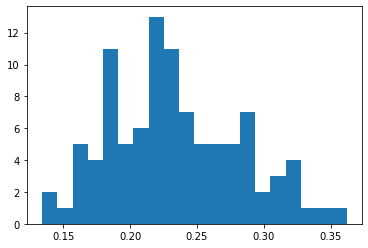

In [79]:
def pdf_convulution_exponential_gauss_2d(t_array,b,sigma):
    t_array = np.sort(t_array.ravel())
    t_array = np.sort(t_array)
    pdf = np.zeros(len(t_array))
    i = int(0)
    for t in t_array:
        x = np.linspace(0, 200, 600)
        integrant = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(t-x)**2/(2*sigma**2))*(np.exp(-x/b)/b)
        pdf[i] = np.trapz(integrant, x)
        i += 1
    norm = np.trapz(pdf, t_array)
    return pdf/norm


def LLH(params, t):
    t = np.sort(t)
    sigma, b = params
    mask = t > 0
    t = t[mask]
    y = pdf_convulution_exponential_gauss_2d(t, b, sigma)
    return -np.sum(np.log(y))

def LLH1(sigma,t):
    t= np.sort(t)
    b =1 
    y = pdf_convulution_exponential_gauss_2d(t, b, sigma)
    mask = y > 0
    y = y[mask]
    return -np.sum(np.log(y))

Like1 = np.zeros(100)
Like2 = np.zeros(100)

for i in range(100):
    t = times[200*i:200*(i+1)]
    a  = minimize(LLH1, 0.5, args=(t))
    b = minimize(LLH, [0.5, 1], args=(t))

    Like1[i] = LLH1(a.x, t)
    Like2[i] = LLH(b.x, t)




<ipython-input-79-08698efcdee1>:8: RuntimeWarning: overflow encountered in exp
  integrant = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(t-x)**2/(2*sigma**2))*(np.exp(-x/b)/b)
<ipython-input-79-08698efcdee1>:8: RuntimeWarning: invalid value encountered in multiply
  integrant = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(t-x)**2/(2*sigma**2))*(np.exp(-x/b)/b)
<ipython-input-79-08698efcdee1>:8: RuntimeWarning: overflow encountered in exp
  integrant = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(t-x)**2/(2*sigma**2))*(np.exp(-x/b)/b)
<ipython-input-79-08698efcdee1>:8: RuntimeWarning: invalid value encountered in multiply
  integrant = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(t-x)**2/(2*sigma**2))*(np.exp(-x/b)/b)
<ipython-input-79-08698efcdee1>:8: RuntimeWarning: overflow encountered in true_divide
  integrant = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(t-x)**2/(2*sigma**2))*(np.exp(-x/b)/b)
<ipython-input-79-08698efcdee1>:21: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y))
c:\Italien\kurser\

(array([ 3.,  4.,  8., 10., 14., 19., 15., 10.,  8.,  8.]),
 array([3.50826612, 3.58661714, 3.66496815, 3.74331917, 3.82167019,
        3.9000212 , 3.97837222, 4.05672324, 4.13507425, 4.21342527,
        4.29177628]),
 <BarContainer object of 10 artists>)

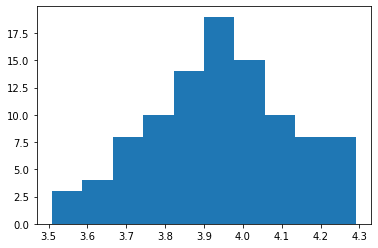

In [102]:
plt.hist(np.log(Like1-Like2))

In [113]:
import minuit


ModuleNotFoundError: No module named 'minuit'

In [109]:
# Initialize list to store -2ln(lambda) values
minus_2_log_lambda = []
# Perform parameter estimation and calculate likelihood ratios for each experiment separately
for i in range(100):
    data = times
    eks = data[i * 200: (i + 1) * 200]
    eks = np.sort(np.sort(eks).ravel())
    
    def fitting_2d(b,sigma):
        return -log_likelihood_2d(np.sort(eks),b,sigma)

    def fitting_1d(sigma):
        return -log_likelihood_1d(np.sort(eks),sigma)

    # Minuit optimization for 2D model
    minuit_2d = Minuit(fitting_2d, b=1, sigma=1)
    minuit_2d.limits['b'] = (0.1,10)
    minuit_2d.limits['sigma']= (0.1,10)
    minuit_2d.migrad()
    mle_2d_b = minuit_2d.values['b']
    mle_2d_sigma = minuit_2d.values['sigma']
    # Minuit optimization for 1D model
    minuit_1d = Minuit(fitting_1d, sigma=1)
    minuit_1d.limits['sigma']= (0.1,10)
    minuit_1d.migrad()
    mle_1d = minuit_1d.values['sigma']
    #print(mle_1d,mle_2d_b,mle_2d_sigma)
    # Likelihood ratio
    null_likelihood = log_likelihood_1d(eks,mle_1d )
    alternative_likelihood = log_likelihood_2d(eks, mle_2d_b, mle_2d_sigma)
    lambda_val = null_likelihood - alternative_likelihood
    #print(np.log(lambda_val),lambda_val)

    # -2ln(lambda)
    minus_2_log_lambda.append(-2 * lambda_val)

NameError: name 'Minuit' is not defined